In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [3]:
df = pd.read_csv('train.csv')
df = df.sort_values(['Date', 'Store'], ascending=True)

In [4]:
import sys
sys.path.insert(1, '/Users/liuyang/Desktop/Springboard_Capstone3/notebook')
import eda

In [5]:
from eda import data_process, Sales_EDA, sumby, individual_store, combined_storedata, combined_store_EDA

In [6]:
df_process = data_process(df)
df_process.convert_datetime('Date')
df_process.str_to_int('StateHoliday')
df_process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,int64
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [7]:
store_sum = df_process.pivot_table('Store', 'sum')
store_sum['AverageDailySales'] = store_sum['Sales']/store_sum['Open']
store_sum['AverageDailyCustomer'] = store_sum['Customers']/store_sum['Open']
store_sum['SalesPerCustomer'] = store_sum['Sales']/store_sum['Customers']

In [8]:
store_sum.sort_values('Sales', ascending=False)

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,AverageDailySales,AverageDailyCustomer,SalesPerCustomer
Store,,,,,,,,,,
262,3204694,3766,942,360,19516842,169,38,20718.515924,3402.010616,6.090080
817,2454370,3766,784,360,17057867,173,38,21757.483418,3130.573980,6.949998
562,2924960,3766,942,360,16927322,209,38,17969.556263,3105.053079,5.787198
1114,2509542,3766,784,360,16202585,169,38,20666.562500,3200.946429,6.456391
251,1908934,3766,779,360,14896870,170,43,19123.068036,2450.492940,7.803764
...,...,...,...,...,...,...,...,...,...,...
263,221342,3033,622,286,2306075,124,39,3707.516077,355.855305,10.418606
208,324162,3766,784,360,2302052,173,38,2936.290816,413.471939,7.101548
198,264690,3766,782,360,2268273,167,39,2900.604859,338.478261,8.569546


## Combine store_sum dataframe with store.csv

In [9]:
# call class combined_storedata
combine = combined_storedata(store_sum, 'store.csv')

In [10]:
# check the detail of store.csv 
combine.data2_info()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
# combine two data set store_sum and store.csv
newstoredata = combine.concatdf()

In [38]:
# newstoredata.to_csv('combined_data.csv', index=False)

In [39]:
newstoredata.head()

,Store,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,AverageDailySales,AverageDailyCustomer,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,440523,3766,781,360,3716854,193,41,4759.096031,564.049936,8.437366,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,457855,3766,784,360,3883858,167,39,4953.900510,583.998724,8.482725,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,584310,3766,779,360,5408261,170,43,6942.568678,750.077022,9.255808,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,1036254,3766,784,360,7556507,173,38,9638.401786,1321.752551,7.292138,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,418588,3766,779,360,3642818,172,45,4676.274711,537.340180,8.702634,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [40]:
# call class data_process().data_info to check info for newstoredata
data_process(newstoredata).data_info()

,column,counts,unique_value_pct,nan_pct,data_type
0,Store,1115,100.0000,0.0000,int64
5,Sales,1115,100.0000,0.0000,int64
8,AverageDailySales,1115,100.0000,0.0000,float64
10,SalesPerCustomer,1115,100.0000,0.0000,float64
9,AverageDailyCustomer,1114,99.9103,0.0000,float64
1,Customers,1113,99.8206,0.0000,int64
13,CompetitionDistance,654,58.6547,0.2691,float64
3,Open,70,6.2780,0.0000,int64
17,Promo2SinceWeek,24,2.1525,48.7892,float64
15,CompetitionOpenSinceYear,23,2.0628,31.7489,float64


## Sales by Store Type 


In [14]:
newstoredata_eda = combined_store_EDA(newstoredata)

In [15]:
# Store type counts
newstoredata_eda.storetype_count()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


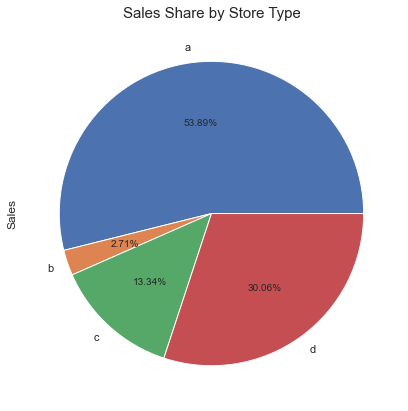

In [16]:
# Total sales share by store type
plt.rcParams['figure.figsize'] = (12, 7)
newstoredata_eda.storetype_share_pie()

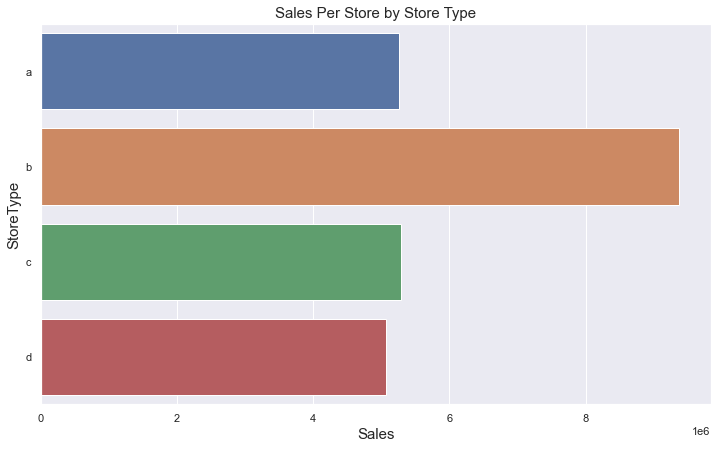

In [17]:
newstoredata_eda.average_sales_by_storetype()

In [18]:
# Sales summary by store type
newstoredata_eda.type_summary('StoreType', 'Sales')

StoreType,a,b,c,d
count,6.020000e+02,1.700000e+01,1.480000e+02,3.480000e+02
mean,5.258031e+06,9.366553e+06,5.292037e+06,5.072968e+06
std,2.046586e+06,4.484603e+06,1.736892e+06,1.379296e+06
min,2.114322e+06,3.794012e+06,2.179287e+06,2.340576e+06
25%,3.838955e+06,6.437314e+06,4.080832e+06,4.026226e+06
50%,4.906032e+06,9.179413e+06,5.127592e+06,4.945824e+06
75%,6.135292e+06,1.085187e+07,6.237014e+06,5.821132e+06
max,1.705787e+07,1.951684e+07,1.217600e+07,1.155352e+07


In [3]:
# # Total sales distribution by store type
# newstoredata_eda.storetype_hist('Sales')

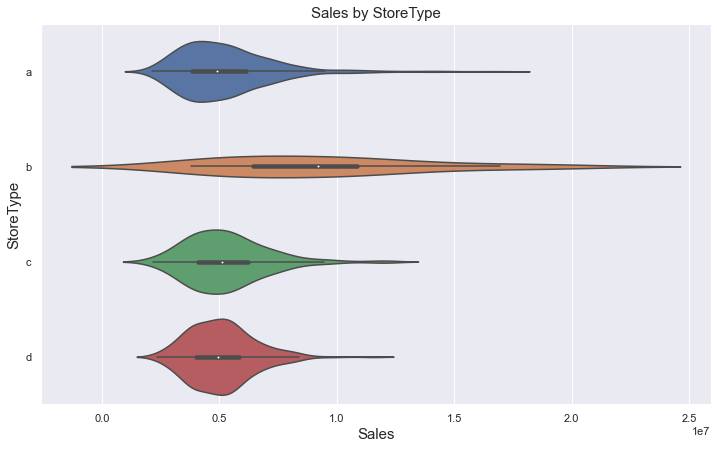

In [20]:
newstoredata_eda.type_violinplot('Sales', 'StoreType')

In [21]:
# Average Daily sales distribution by store type
newstoredata_eda.type_summary('StoreType', 'AverageDailySales')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,6912.542955,10110.779605,6917.199267,6823.743727
std,2587.428205,4593.997196,2173.694246,1779.628297
min,2703.736573,4070.828326,2790.380282,3005.983312
25%,5091.751317,6936.760776,5351.053715,5534.711359
50%,6481.216945,9744.599788,6645.840010,6695.215430
75%,7974.122165,11643.638412,8063.268787,7774.570026
max,21757.483418,20718.515924,15530.605867,18574.795820


In [2]:
#newstoredata_eda.storetype_hist('AverageDailySales')

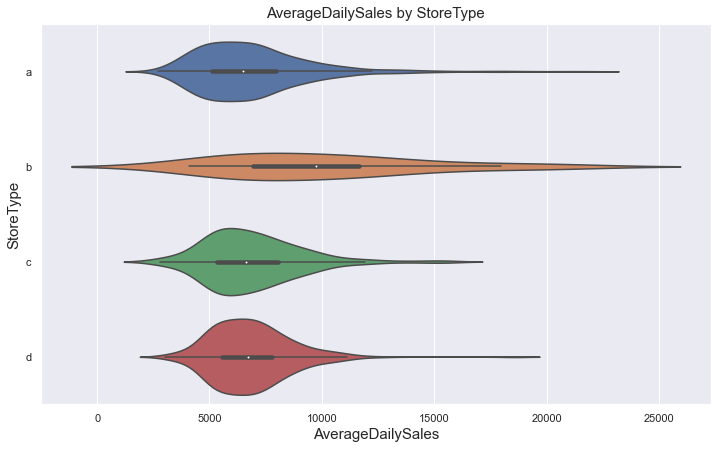

In [23]:
newstoredata_eda.type_violinplot('AverageDailySales', 'StoreType')

In [1]:
# ## Customer by Store Type

# # customer summary by store type
# newstoredata_eda.type_summary('StoreType', 'Customers')

# # Total customer distribution by store type
# newstoredata_eda.storetype_hist('Customers')

# newstoredata_eda.type_violinplot('Customers', 'StoreType')

# # Average Daily customer summary
# newstoredata_eda.type_summary('StoreType', 'AverageDailyCustomer')

# newstoredata_eda.storetype_hist('AverageDailyCustomer')

# newstoredata_eda.type_violinplot('AverageDailyCustomer','StoreType')

## Sales Per Customer by Store Type

In [30]:
newstoredata_eda.type_summary('StoreType', 'SalesPerCustomer')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,8.958480,5.168023,8.737413,11.433302
std,1.467117,1.174245,1.399375,1.641336
min,5.847553,3.513703,5.583326,6.576090
25%,7.881745,4.100593,7.787305,10.274640
50%,8.814441,4.908172,8.460005,11.472793
75%,9.902678,6.090080,9.730982,12.568605
max,13.431507,7.162148,12.262507,16.162639


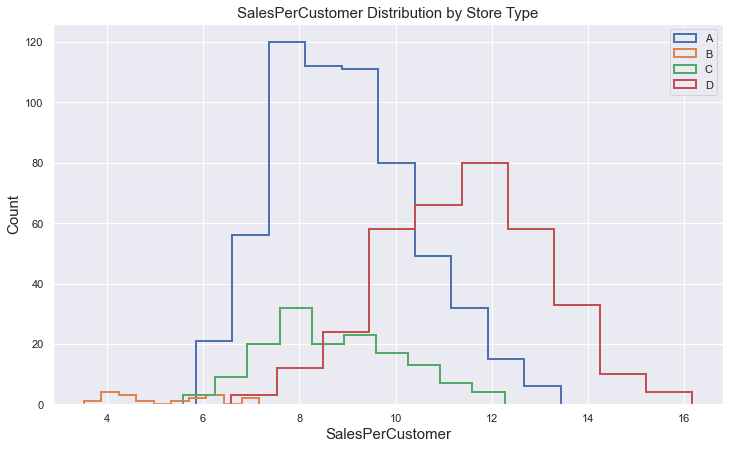

In [31]:
# Sales per customer distribution by store type
newstoredata_eda.storetype_hist('SalesPerCustomer')

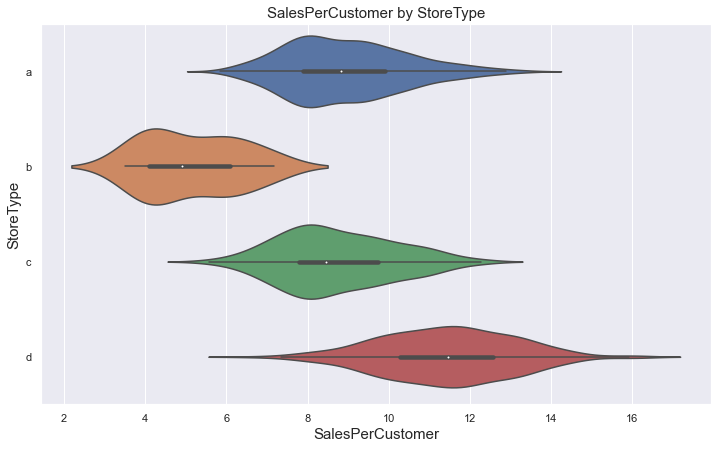

In [32]:
newstoredata_eda.type_violinplot('SalesPerCustomer', 'StoreType')

# Note: Type B Stores have the highest sales per store but the lowest sales per customer

## Competition Distance by Store Type

In [33]:
newstoredata_eda.type_summary('StoreType', 'CompetitionDistance')

StoreType,a,b,c,d
count,601.000000,17.000000,148.000000,346.000000
mean,5123.061564,1060.588235,3522.567568,6913.063584
std,8420.917544,831.808802,5944.811048,6769.367096
min,20.000000,90.000000,40.000000,50.000000
25%,460.000000,590.000000,490.000000,1880.000000
50%,1790.000000,900.000000,1660.000000,5040.000000
75%,5020.000000,1270.000000,3985.000000,9702.500000
max,75860.000000,3640.000000,45740.000000,48330.000000


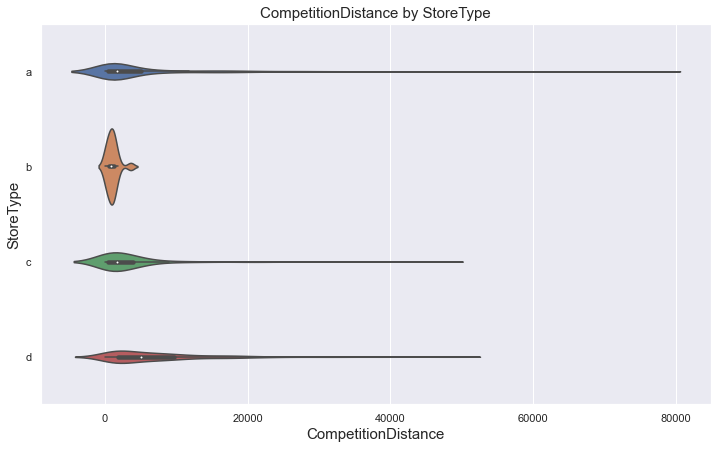

In [34]:
newstoredata_eda.type_violinplot('CompetitionDistance','StoreType')

## SalesPerCustomer VS CompetitionDistance

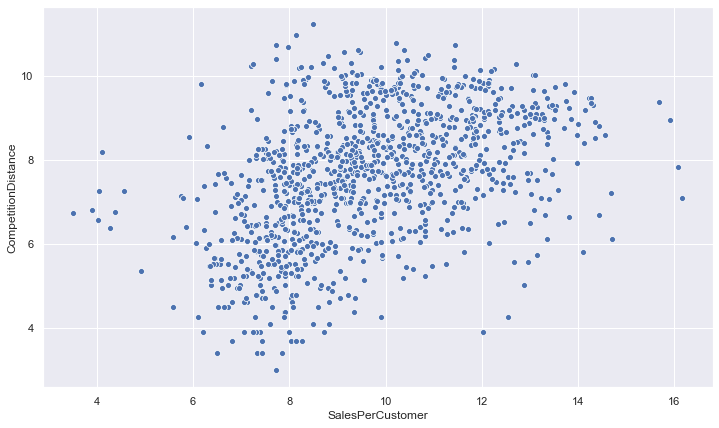

In [35]:
sns.scatterplot(x=newstoredata.SalesPerCustomer, y=np.log(newstoredata.CompetitionDistance))
plt.show()

# Note: Type B Store has the lowest sales per customer, and the reason caused it may be having  competitiors more nearby than other store types, as SalesPerCustomer turns to be low when competitionDistance is short.

## Open days and Store Type

In [36]:
newstoredata_eda.type_summary('StoreType', 'Open')

StoreType,a,b,c,d
count,602.000000,17.000000,148.000000,348.000000
mean,759.264120,915.470588,763.364865,743.603448
std,57.974362,62.330889,47.957202,68.423694
min,597.000000,745.000000,592.000000,606.000000
25%,776.000000,931.000000,777.000000,769.750000
50%,779.000000,942.000000,780.000000,779.000000
75%,782.000000,942.000000,784.000000,781.000000
max,906.000000,942.000000,784.000000,901.000000


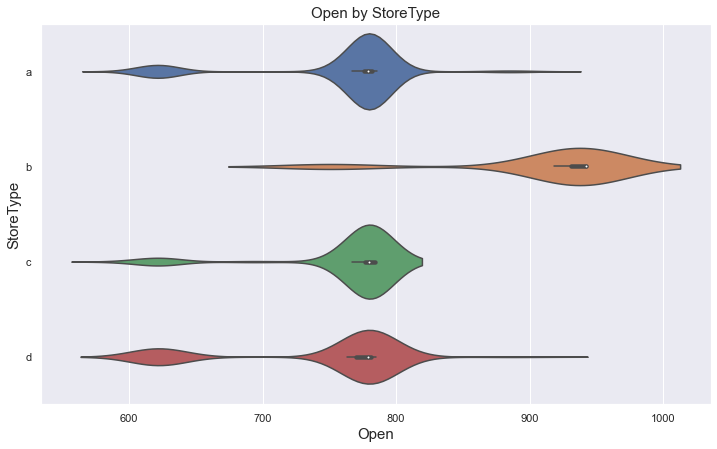

In [37]:
newstoredata_eda.type_violinplot('Open','StoreType')

## Note: From the analysis above we have enough reason to assume that Type store is a comparatively new type of store located in the urban city area that Rossmann started experimentally. As the store number of Type B store is way less than the other 3 types and they were the store type that didn't close for renovation. Meaning the stores may be comparatively new comparing to others. These type of store generate the highest sales per store. However the sales per customer is the lowest among all type. So the important mission for this type of store is to think how to increase sales/spend per customer.

## Promo by Store Type

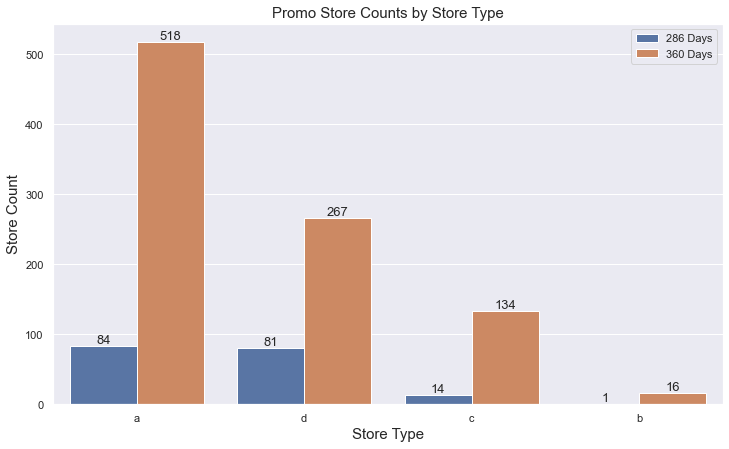

In [79]:
ax = sns.countplot('StoreType', hue='Promo', data=newstoredata, order= newstoredata['StoreType'].value_counts().index)
ax.set_xlabel('Store Type',fontsize=15)
ax.set_ylabel('Store Count',fontsize=15)
#ax.set_suptitle('Variable vs Target')
ax.legend(['286 Days', '360 Days'])

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()


    ax.text(left.get_x() + left.get_width()/2., height_l + 3, '{}'.format(height_l), ha="center",fontsize=13)
    ax.text(right.get_x() + right.get_width()/2., height_r + 3, '{}'.format(height_r), ha="center",fontsize=13)

plt.title('Promo Store Counts by Store Type', fontsize=15)
plt.show()